## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

In [3]:
# Write your code from here
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-01', '2023-02-02', '2023-03-01'],
    'product_id': [101, 102, 103, 104, 105, 106],
    'quantity': [10, 5, np.nan, 20, 15, 12],  # Some missing values in 'quantity'
    'price': [500, 300, 200, 400, np.nan, 450]  # Some missing values in 'price'
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('sales_data.csv', index=False)

print("sales_data.csv file created successfully!")


sales_data.csv file created successfully!


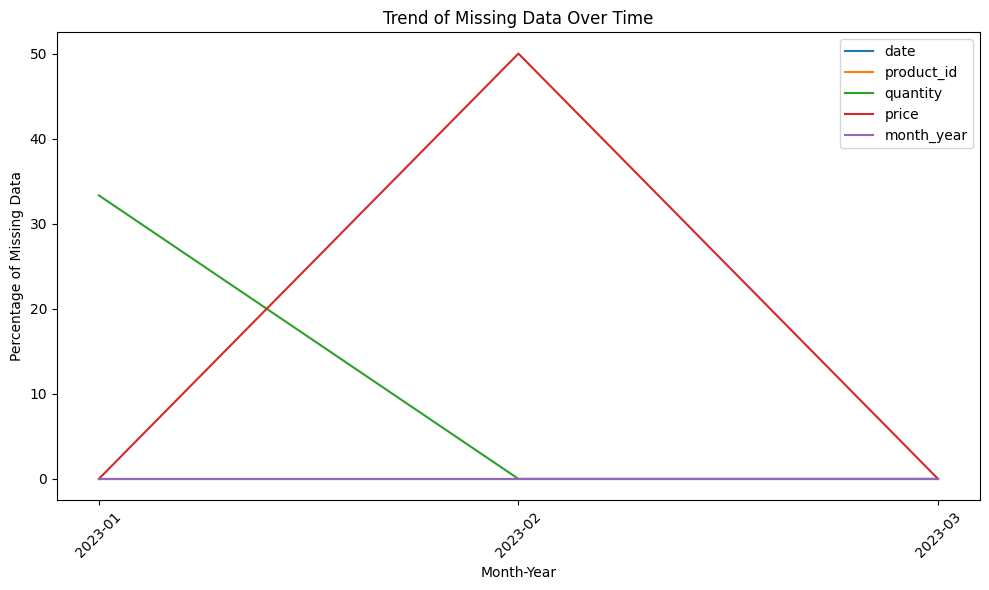

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data
def load_sales_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found!")
        return None

# Calculate the missing data percentage for each month
def calculate_missing_data(df):
    # Ensure 'date' column is datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Drop rows where 'date' is invalid after conversion
    df = df.dropna(subset=['date'])
    
    # Create a new column to represent the month and year for grouping
    df['month_year'] = df['date'].dt.to_period('M')
    
    # Calculate the missing data for each column
    missing_data = df.isnull().mean() * 100  # Percentage of missing values per column
    missing_data_by_month = df.groupby('month_year').apply(lambda x: x.isnull().mean() * 100)
    
    return missing_data_by_month

# Visualize the missing data trend over time
def visualize_missing_data(missing_data_by_month):
    # Plotting the missing data percentages over time
    plt.figure(figsize=(10, 6))
    for column in missing_data_by_month.columns:
        plt.plot(missing_data_by_month.index.astype(str), missing_data_by_month[column], label=column)
    
    plt.xlabel('Month-Year')
    plt.ylabel('Percentage of Missing Data')
    plt.title('Trend of Missing Data Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to load data, calculate and visualize missing data
def main():
    file_path = 'sales_data.csv'
    df = load_sales_data(file_path)
    
    if df is not None:
        missing_data_by_month = calculate_missing_data(df)
        visualize_missing_data(missing_data_by_month)

# Run the main function
if __name__ == "__main__":
    main()
